In [1]:
# Packages 
%matplotlib notebook
from ipywidgets import *
import pydicom 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob2
import glob
from tkinter import *
import tkinter.filedialog as tkFileDialog

from openpyxl import load_workbook
from openpyxl.worksheet.table import Table
import pandas as pd

#import pymedphys
#import flashgamma

print (" hello")



 hello


In [2]:
ds_dose = pydicom.read_file('RD.dcm')
ds_plan = pydicom.read_file('RP.dcm')

In [3]:



# ********************** Définition de la fonction Profil dans le sens tète- pieds ****************************************
# Note : y_profil représente la profondeur et z_profil représente la coupe 
def Plot_Profil_2(ds_dose, ds_plan , y_profil, x_profil, mesure) : 
    if ds_dose is None or ds_plan is None :
        print ('Error put RTdose and RTplan')
    else : 
        
        Titre = 'Dose normalisée pour comparer au film :' 
        legende = 'Dose normalisée issue du RTdose :' 
#         Titre = input('saisi le Titre de graphe :' )
#         legende = input('saisi la légende de la courbe 01 :' )
    #def Plot_Rdt(ds_dose, ds_plan , x_Rdt, z_Rdt, num_graphe) : 
        #Coord isocentre à partir de RT_plan converties en mm
        coord_iso_x=ds_plan.BeamSequence[0].ControlPointSequence[0].IsocenterPosition[0]
        coord_iso_y=ds_plan.BeamSequence[0].ControlPointSequence[0].IsocenterPosition[1]
        coord_iso_z=ds_plan.BeamSequence[0].ControlPointSequence[0].IsocenterPosition[2]

        # Faire un lien entre le RT dose et RT plan 
        position_image=list(ds_dose['0020','0032'].value) #Orientation du repère comme dans  x augmente à gauche, y en post, z en tête   
        position_image_x=list(ds_dose['0020','0032'].value)[0]
        position_image_y=list(ds_dose['0020','0032'].value)[1]
        position_image_z=list(ds_dose['0020','0032'].value)[2]

        # coupe centrale et point centrale dans la matrice de dose 
        Z_centre = int(ds_plan.BeamSequence[0].ControlPointSequence[0].IsocenterPosition[2]-int(position_image_z))
        iso_X =int(ds_plan.BeamSequence[0].ControlPointSequence[0].IsocenterPosition[0]-int(position_image_x))
        iso_Y =int(ds_plan.BeamSequence[0].ControlPointSequence[0].IsocenterPosition[1]-int(position_image_y))

        dim_dose= ds_dose.pixel_array.shape

        px=pixel_spacing_x=(ds_dose['0028','0030'].value[0]) #definition de la résolution de la matrice de dose
        pixel_spacing_y=(ds_dose['0028','0030'].value[1])
        slice_spacing_z=(ds_dose['3004','000C'].value[1])

        coord_iso_dose=(round(iso_X/pixel_spacing_x),round(iso_Y/pixel_spacing_y),round(Z_centre/slice_spacing_z))

        # ------------------- les limites en X et Y et Z -------------
        X_lim = ((-coord_iso_dose[0])*pixel_spacing_x,(dim_dose[2]-coord_iso_dose[0])*pixel_spacing_x)
        #print ('X_lim= ',X_lim)
        Y_lim = (0,dim_dose[1]*pixel_spacing_y)
        #print ('Y_lim= ',Y_lim)
        Z_lim = ((-coord_iso_dose[2])*slice_spacing_z,(dim_dose[0]-coord_iso_dose[2])*slice_spacing_z)
        #print ('Z_lim= ',Z_lim)


        #----------------------------------- Profil------------------------------
        # choix de (y et z en mm )
        #y_profil = 25  # en mm
        coord_y_profil = int(y_profil/pixel_spacing_y)
        #z_profil = 0     # en mm
        #coord_z_profil = int(z_profil/slice_spacing_z + coord_iso_dose[2])
        coord_x_profil = int(x_profil/pixel_spacing_x + coord_iso_dose[0])

        # la fonction Profil 
        Max_dose= max(ds_dose.pixel_array[:,coord_y_profil,coord_x_profil])
#        Profil = np.array(ds_dose.pixel_array[:,coord_y_profil,coord_x_profil])/(Max_dose)*100
        Profil = np.array(ds_dose.pixel_array[:,coord_y_profil,coord_x_profil])*ds_dose.DoseGridScaling
        print('Max_dose', Max_dose, Profil, pixel_spacing_x, pixel_spacing_y, slice_spacing_z)
    
        # L'axe horizontal de profil
        z_axis_profil= np.linspace((-coord_iso_dose[2])*slice_spacing_z,(dim_dose[0]-coord_iso_dose[2])*slice_spacing_z,(dim_dose[0]))

        #fig = plt.figure()
        fig, axs = plt.subplots(1,1)
        #axs[0].plot(y_axis_Rdt,Rdt,color='tab:blue')
        #axs[0].plot(y_axis_Rdt,Rdt_1,color='tab:red')
        axs.set_xlabel('Z (mm)')
        axs.set_ylabel('Dose relative (%)')
        axs.set_ylim( ymin=0, ymax=120)
        axs.set_xlim(left=None, right=None, emit=True, auto=False, xmin=-200, xmax=200)
        axs.set_xlim(left=None, right=None, emit=True, auto=False)
        axs.set_title(Titre)
        line_Profil, = axs.plot(z_axis_profil,Profil, color='tab:Blue', label=legende,linestyle="dashed")
        axs.legend(loc="lower center")



###################################### Partie des courbes des mesures #########################
      
                
   
            
        def update(y_profil=y_profil , x_profil=x_profil):
            # Profil
            coord_y_profil = int(y_profil/pixel_spacing_y)
            coord_x_profil = int(x_profil/pixel_spacing_x + coord_iso_dose[0])
            Max_dose= max(ds_dose.pixel_array[:,coord_y_profil,coord_x_profil])
            Profil = np.array(ds_dose.pixel_array[:,coord_y_profil,coord_x_profil])/(Max_dose)*100 
          #  Profil = np.array(ds_dose.pixel_array[:,coord_y_profil,coord_x_profil])*ds_dose.DoseGridScaling
            line_Profil.set_ydata(Profil)
          
        interact(update, y_profil=(Y_lim[0], Y_lim[1], 1),x_profil=(X_lim[0], X_lim[1], 1)); 

Max_dose 41323 [0.04888558 0.04924503 0.04978421 0.05014367 0.05068284 0.0510423
 0.05158148 0.05212066 0.05248011 0.05301929 0.05355847 0.05391792
 0.0544571  0.05499628 0.05553546 0.05607464 0.05643409 0.05697327
 0.05769217 0.05805163 0.05859081 0.05930971 0.05984889 0.06038807
 0.06110698 0.06164616 0.06218533 0.06290424 0.06362315 0.06416232
 0.06488123 0.06542041 0.06631904 0.06685822 0.06757713 0.06829603
 0.06919466 0.06991357 0.07063248 0.07135138 0.07225001 0.07314864
 0.07386755 0.07476618 0.07566481 0.07656345 0.07746208 0.07836071
 0.07943907 0.0803377  0.08141606 0.08231469 0.08339305 0.08447141
 0.08572949 0.08680785 0.08806594 0.08914429 0.09040238 0.09166046
 0.09291855 0.09417663 0.09561444 0.09705226 0.09866979 0.1001076
 0.10172514 0.10334268 0.10496022 0.10675748 0.10837502 0.11017228
 0.11196955 0.11376681 0.1157438  0.11772079 0.11951806 0.12167477
 0.12365176 0.12580848 0.12778547 0.13012191 0.13227863 0.13461507
 0.13695152 0.13928796 0.14180413 0.1443203  0.14

<IPython.core.display.Javascript object>


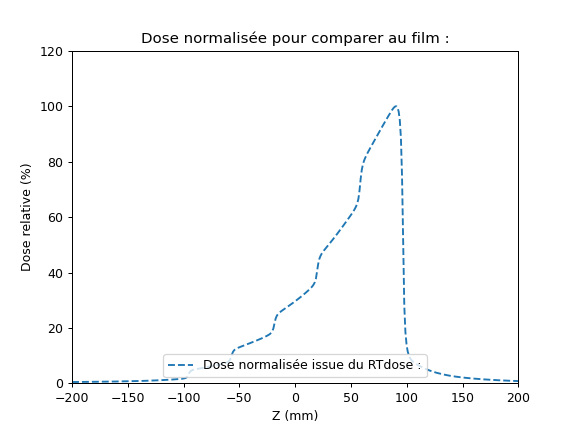

interactive(children=(FloatSlider(value=100.0, description='y_profil', max=404.0, step=1.0), FloatSlider(value…

In [4]:
Plot_Profil_2(ds_dose, ds_plan, 100, 0,None)